<div align="center">
      <h1>Linear Classifier as a Template Matching Algorithm</h1>
      <hr>
      <p>In this notebook, you will implement a linear classifier on CIFAR-10. In images it might be better to think about linear classifier differently than in the previous notebook. In the previous notebook, we have used the linear classifier to classify the data points in the feature space. We tried to find the best hyperplanes that separate the data points in the feature space. In images, we can think about the linear classifier as a classifier that tries to find the best hyperplanes that separate the images in the pixel space, but that is kind of hard to imagine. Instead we will build an understaning of the linear classifier using different perspective - template matching.</p>
</div>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['image.interpolation'] = 'nearest'

%load_ext autoreload
%autoreload 2

In [2]:
from utils.cifar import download_cifar10

# download the CIFAR-10 dataset
cifar10_dir = './data/datasets/CIFAR10'
download_cifar10(cifar10_dir)

CIFAR-10 dataset already exists


---------------- Training data ----------------
X_train shape: (50000, 32, 32, 3), y_train shape: (50000,)

---------------- Testing data ----------------
X_test shape: (10000, 32, 32, 3), y_test shape: (10000,)

---------------- Dataset info ----------------
Number of classes: 10
Number of features: 3072
Number of samples in dataset: 60000
Number of samples in training set: 50000, which is 83.33% of the dataset
Number of samples in testing set: 10000, which is 16.67% of the dataset


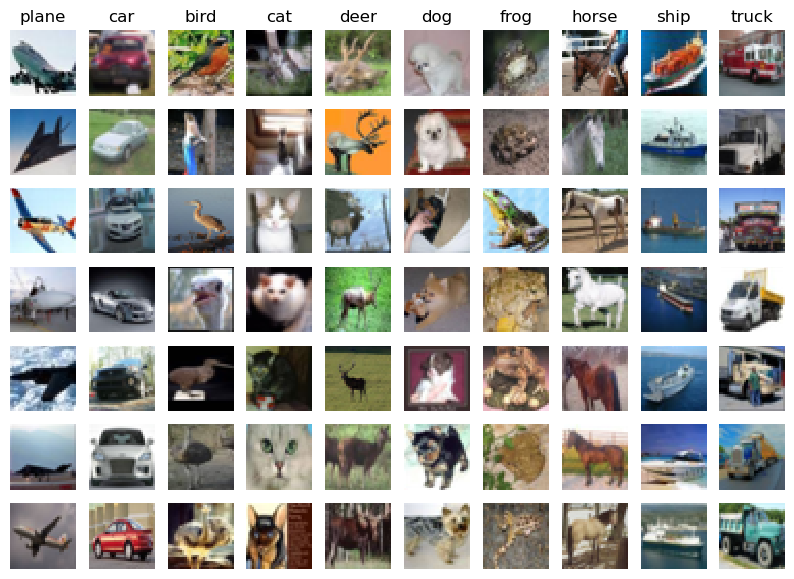

In [3]:
from utils.cifar import load_cifar10, visualize_cifar10
from assignments.preprocessing import reshape_to_vectors

X_train, y_train, X_test, y_test = load_cifar10(cifar10_dir)

num_classes = len(np.unique(y_train))

# Print the shapes of the data
print('---------------- Training data ----------------')
print(f'X_train shape: {X_train.shape}, y_train shape: {y_train.shape}')

print('\n---------------- Testing data ----------------')
print(f'X_test shape: {X_test.shape}, y_test shape: {y_test.shape}')

print('\n---------------- Dataset info ----------------')
print(f'Number of classes: {num_classes}')
print(f'Number of features: {np.prod(X_train.shape[1:])}')
print(f'Number of samples in dataset: {len(X_train) + len(X_test)}')
print(f'Number of samples in training set: {len(X_train)}, '
      f'which is {100 * len(X_train) / (len(X_train) + len(X_test)):.2f}% of the dataset')
print(f'Number of samples in testing set: {len(X_test)}, '
      f'which is {100 * len(X_test) / (len(X_train) + len(X_test)):.2f}% of the dataset')

# visualize some examples from the dataset
visualize_cifar10(X_train, y_train)

# Reshape the image data into rows
X_train = reshape_to_vectors(X_train)
X_test = reshape_to_vectors(X_test)

In [4]:
from assignments.linear_classifier import LinearClassifier

# Create a linear classifier instance
linear_classifier = LinearClassifier(num_features=X_train.shape[1],
                                     num_classes=len(np.unique(y_train)),
                                     learning_rate=1e-6,
                                     num_iters=1000,
                                     batch_size=200,
                                     verbose=True)

# Train the classifier
linear_classifier.train(X_train, y_train)

# Compute the accuracy on the training and testing set
y_train_pred = linear_classifier.predict(X_train)
train_accuracy = np.mean(y_train == y_train_pred)
print(f'Train accuracy: {train_accuracy:.2f}')

iteration 0 / 1000: 2.635783556039179
iteration 100 / 1000: 6.42560518761547
iteration 200 / 1000: 4.634661989536605
iteration 300 / 1000: 4.56314534466031
iteration 400 / 1000: 6.582197790831267
iteration 500 / 1000: 5.375488684541027
iteration 600 / 1000: 5.607721871359987
iteration 700 / 1000: 4.086663528777532
iteration 800 / 1000: 4.961534066055087
iteration 900 / 1000: 3.544859230815602
Train accuracy: 0.21


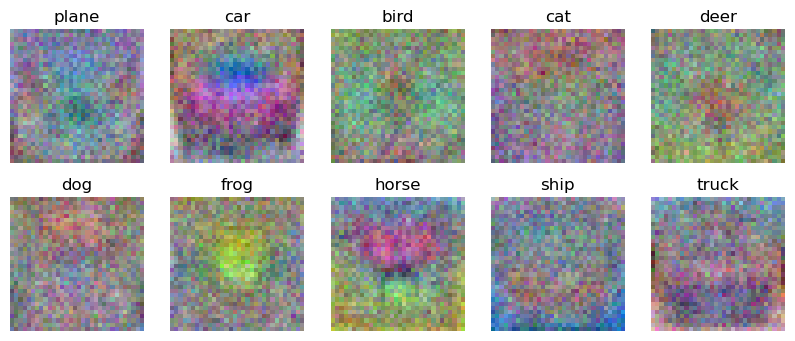

In [5]:
w = linear_classifier.W.data
w = w.reshape(32, 32, 3, 10)

w_min, w_max = np.min(w), np.max(w)

classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
fig, axes = plt.subplots(2, 5, figsize=(10, 4))
for c in range(num_classes):
    wimg = 255.0 * (w[:, :, :, c].squeeze() - w_min) / (w_max - w_min)
    axes.flat[c].imshow(wimg.astype('uint8'))
    axes.flat[c].axis('off')
    axes.flat[c].set_title(classes[c])

## Normalizing the data

Now we will normalize the data and see how it affects the performance of the classifier. Go to the `assignments/preprocessing.py` file and implement the `normalize_data` function. After you have implemented the function, run the following cells to normalize the data and train the classifier again.

In [6]:
from assignments.preprocessing import normalize_data

X_train_normalized = normalize_data(X_train)
X_test_normalized = normalize_data(X_test)

In [7]:
from assignments.linear_classifier import LinearClassifier

# Create a linear classifier instance
linear_classifier = LinearClassifier(num_features=X_train_normalized.shape[1],
                                     num_classes=len(np.unique(y_train)),
                                     learning_rate=1e-3,
                                     num_iters=1000,
                                     batch_size=200,
                                     verbose=True)

# Train the classifier
linear_classifier.train(X_train_normalized, y_train)

# Compute the accuracy on the training and testing set
y_train_pred = linear_classifier.predict(X_train_normalized)
train_accuracy = np.mean(y_train == y_train_pred)
print(f'Train accuracy: {train_accuracy:.2f}')

iteration 0 / 1000: 2.3025431009437605
iteration 100 / 1000: 1.9491354511288272
iteration 200 / 1000: 1.9708289965869181
iteration 300 / 1000: 1.869101344734916
iteration 400 / 1000: 1.8661595246499298
iteration 500 / 1000: 1.7788522134744724
iteration 600 / 1000: 1.9444491417151584
iteration 700 / 1000: 1.8334652468600636
iteration 800 / 1000: 1.8440840005413168
iteration 900 / 1000: 1.6651022227360806
Train accuracy: 0.40


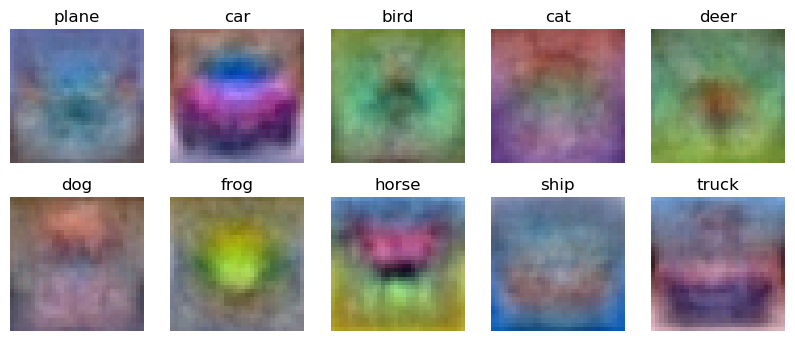

: 

In [8]:
w = linear_classifier.W.data
w = w.reshape(32, 32, 3, 10)

w_min, w_max = np.min(w), np.max(w)

classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
fig, axes = plt.subplots(2, 5, figsize=(10, 4))
for c in range(num_classes):
    wimg = 255.0 * (w[:, :, :, c].squeeze() - w_min) / (w_max - w_min)
    axes.flat[c].imshow(wimg.astype('uint8'))
    axes.flat[c].axis('off')
    axes.flat[c].set_title(classes[c])

## QUESTIONS
1. Why is the accuracy higher when the classifier is trained on normalized data?
2. Why the weights of the classifier trained on normalized data look less noisy?

## ANSWERS
1. Because when data are normalized, it's easier to train on this data (it makes classifier less sensitive to the absolute values of the features, and more focused on the relationships between them.)
2. Because normalization helps to reduce outliers influence.